Hämtar MNIST-data...


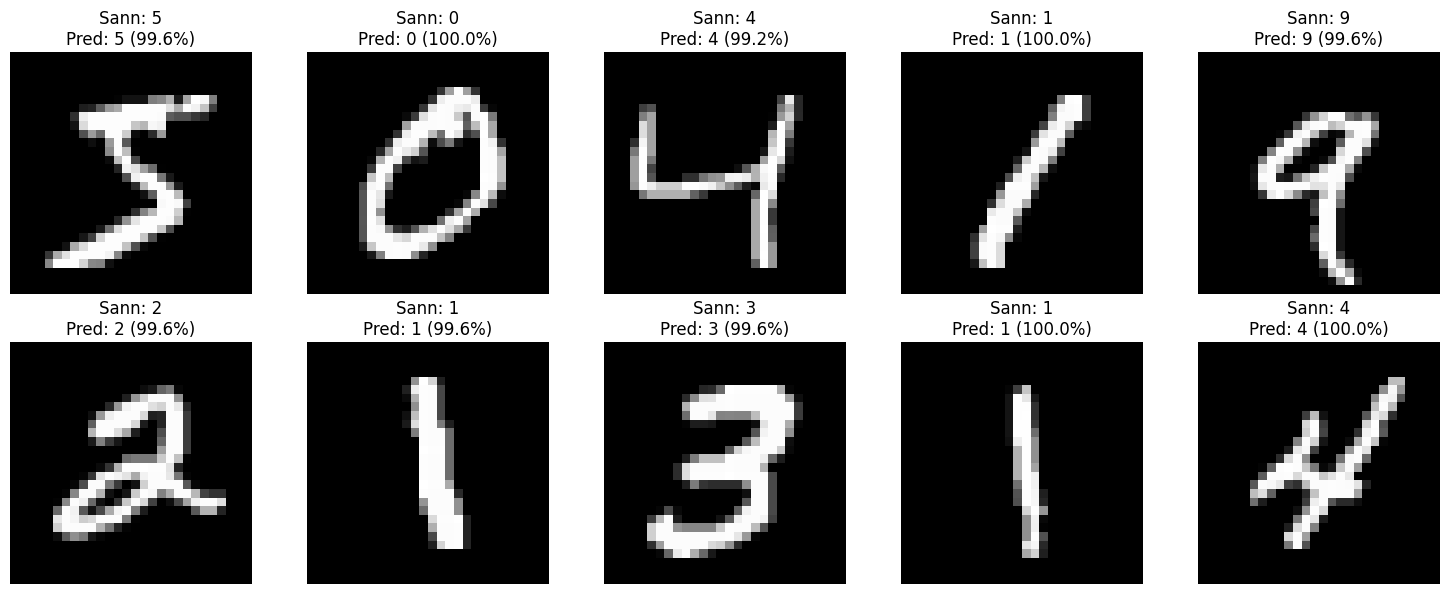

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from joblib import load
from sklearn.pipeline import Pipeline

# 1. Ladda MNIST (om du inte redan har X_test i minnet)
print("Hämtar MNIST-data...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X_mnist, y_mnist = mnist["data"], mnist["target"]

# 2. Ladda din scaler och modell
model = load("mnist_extratrees_final.joblib")
scaler = load("mnist_scaler.joblib")
pipe = Pipeline([('scaler', scaler), ('model', model)])

# 3. Visa de första 10 bilderna
plt.figure(figsize=(15, 6))

for i in range(10):
    # Hämta en bild och dess sanna etikett
    image = X_mnist[i].reshape(1, -1)
    true_label = y_mnist[i]
    
    # Gör prediktion med din pipeline
    pred = pipe.predict(image)[0]
    proba = pipe.predict_proba(image)[0]
    conf = proba[int(pred)] # Sannolikheten för den gissade siffran

    # Skapa subplot (2 rader, 5 kolumner)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.reshape(28, 28), cmap="gray")
    
    # Sätt röd titel om den gissar fel, annars svart
    color = "black" if str(pred) == str(true_label) else "red"
    plt.title(f"Sann: {true_label}\nPred: {pred} ({conf:.1%})", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

Hämtar MNIST-data...


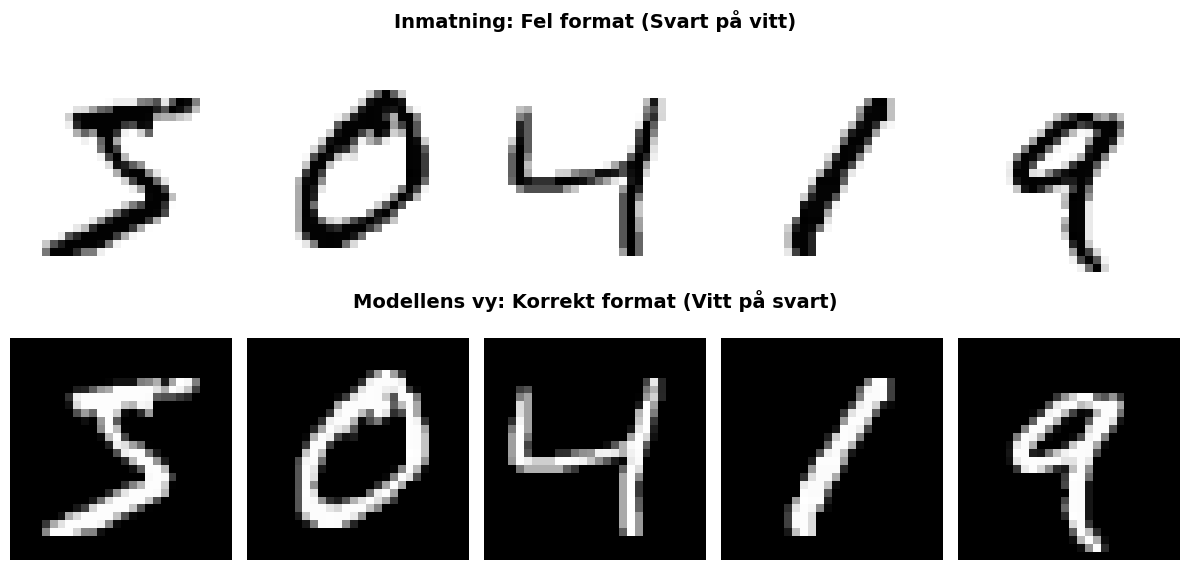

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

# 1. Hämta MNIST-data
print("Hämtar MNIST-data...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X_mnist = mnist["data"]

# 2. Skapa panelen (2 rader, 5 kolumner)
plt.figure(figsize=(12, 6))

for i in range(5):
    # --- ÖVRE RADEN: Fel format (Svart på vitt) ---
    plt.subplot(2, 5, i + 1)
    # Vi inverterar bilden (255 - pixelvärde) för att simulera svart siffra på vitt
    img_wrong = 255 - X_mnist[i].reshape(28, 28)
    plt.imshow(img_wrong, cmap="gray")
    if i == 2: plt.title("Inmatning: Fel format (Svart på vitt)\n", fontsize=14, fontweight='bold')
    plt.axis("off")

    # --- UNDRE RADEN: Korrekt format (Vitt på svart) ---
    plt.subplot(2, 5, i + 6)
    # Original-MNIST är redan i rätt format
    img_correct = X_mnist[i].reshape(28, 28)
    plt.imshow(img_correct, cmap="gray")
    if i == 2: plt.title("Modellens vy: Korrekt format (Vitt på svart)\n", fontsize=14, fontweight='bold')
    plt.axis("off")

plt.tight_layout()
plt.show()

Hämtar MNIST-data...


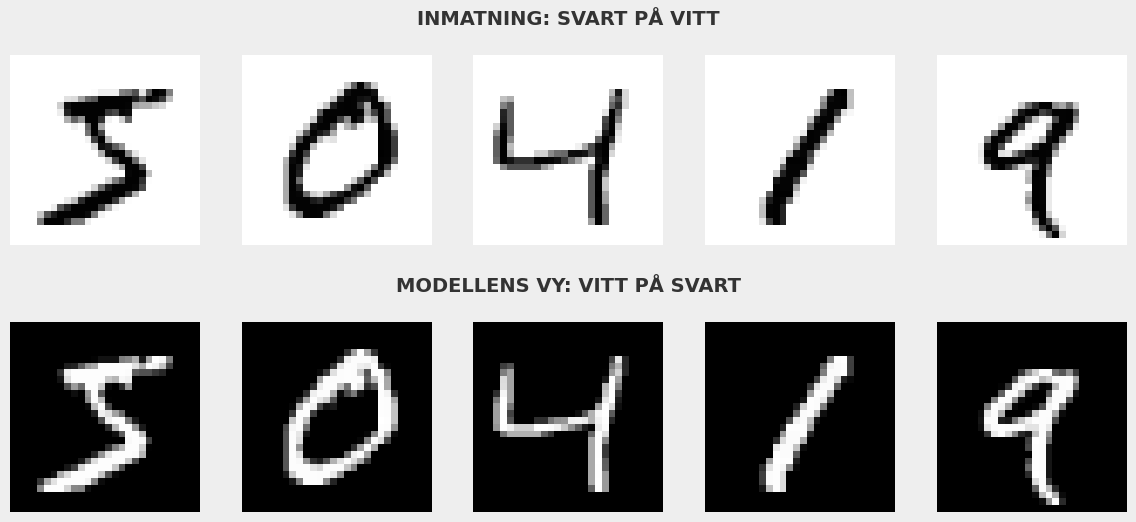

Klart! Bilden 'mnist_comparison_grey_panel.png' har sparats i din mapp.


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

# 1. Hämta MNIST-data (detta tar några sekunder första gången)
print("Hämtar MNIST-data...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X_mnist = mnist["data"]

# 2. Skapa figuren med en ljusgrå bakgrundspanel
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('#eeeeee') # Den grå panelen

for i in range(5):
    # --- ÖVRE RADEN: Inmatning (Svart på vitt) ---
    ax1 = plt.subplot(2, 5, i + 1)
    # Invertera: 255 - pixelvärde
    img_wrong = 255 - X_mnist[i].reshape(28, 28)
    ax1.imshow(img_wrong, cmap="gray", vmin=0, vmax=255)
    
    # Titlar på mittenbilden för att förklara raden
    if i == 2: 
        ax1.set_title("INMATNING: SVART PÅ VITT\n", fontsize=14, fontweight='bold', color='#333333')
    
    # Ta bort axlar men behåll en liten marginal (vit "ruta" syns tack vare grå bakgrund)
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)

    # --- UNDRE RADEN: Modellens vy (Vitt på svart) ---
    ax2 = plt.subplot(2, 5, i + 6)
    img_correct = X_mnist[i].reshape(28, 28)
    ax2.imshow(img_correct, cmap="gray", vmin=0, vmax=255)
    
    if i == 2: 
        ax2.set_title("MODELLENS VY: VITT PÅ SVART\n", fontsize=14, fontweight='bold', color='#333333')
    
    ax2.axis("off")

# Snygga till layouten
plt.tight_layout(pad=3.0)

# Spara bilden för videon
plt.savefig('mnist_comparison_grey_panel.png', facecolor=fig.get_facecolor(), dpi=300)

# Visa resultatet i VS Code
plt.show()

print("Klart! Bilden 'mnist_comparison_grey_panel.png' har sparats i din mapp.")